<a href="https://colab.research.google.com/github/SushantVij/ML_WeatherPrediction/blob/main/Australia_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neuralprophet

0. Install and Import Dependencies

In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt




It looks like you're trying to install the NeuralProphet library and then import the necessary dependencies for your project. The code snippets you provided are correct, and they indicate that you are setting up your environment to use NeuralProphet for time series forecasting. Here's a brief explanation of what each part does:
1. **Installing NeuralProphet:**
   The `!pip install neuralprophet` command is used to install the NeuralProphet library. This library is designed for time series forecasting tasks, and it offers an interface for training and evaluating forecasting models based on neural networks.
2. **Importing Dependencies:**
   - `import pandas as pd`: This imports the Pandas library, which is a powerful data manipulation and analysis tool. You will likely use it to handle your data, perform preprocessing, and create dataframes.
   
   - `from neuralprophet import NeuralProphet`: This line imports the `NeuralProphet` class from the NeuralProphet library. This class provides the functionality needed to create and train neural network-based forecasting models.
   
   - `from matplotlib import pyplot as plt`: This imports the Matplotlib library, which is a popular visualization tool in Python. You'll use it to create plots and visualize the results of your forecasts.

Make sure you have installed the NeuralProphet library using the `!pip install neuralprophet` command in your Python environment before running the code that imports its classes and functions. Additionally, you will need to have Pandas and Matplotlib installed as well.

Remember that this code is just the initial setup. To perform weather prediction and climatic change forecasting, you'll need to follow the steps you outlined in your project description, such as data preprocessing, model training, forecasting, and evaluation.



1. Read in Data and Process Dates

In [ ]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane'],
      dtype=object)

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [ ]:
#import warnings
#warnings.filterwarnings('ignore')
melb = df[df['Location']=='Melbourne']
melb['Date'] = pd.to_datetime(melb['Date'])
melb.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-01-07,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-02-07,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-03-07,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-04-07,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-05-07,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No


In [ ]:
melb.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

It seems like you've provided a snippet of code that involves reading and exploring a weather dataset using Pandas. Let's break down what you're doing step by step:

1. **Reading the Data:**
   You've loaded a CSV file named 'weatherAUS.csv' into a Pandas DataFrame using the `pd.read_csv('weatherAUS.csv')` command. This DataFrame contains weather data with multiple columns, such as 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', and so on.

2. **Displaying the First Few Rows:**
   The `df.head()` command is used to display the first five rows of the DataFrame. This gives you an initial glimpse of the data.

3. **Unique Locations:**
   The `df.Location.unique()` command shows the unique values in the 'Location' column of the DataFrame. This is useful to see the different weather observation locations included in the dataset.

4. **Column Names:**
   The `df.columns` command displays the names of all the columns present in the DataFrame.

5. **Data Types:**
   The `df.dtypes` command shows the data types of each column in the DataFrame. From the output, you can see that 'Date' is of type 'object' (usually indicating text), while other columns have various numeric and object types.

It looks like you've successfully loaded the data and performed some initial exploration. The dataset includes various weather-related features, and you can use this data for further processing, visualization, and eventually for training your machine learning models as outlined in your project.

The code snippet you've provided is a simple Matplotlib plot command that creates a line plot to visualize the 'Rainfall' values over time for a specific location (presumably Melbourne) using the 'Date' column from your dataset. Here's a breakdown of the code:

1. **`plt.plot(melb['Date'], melb['Rainfall'])`:**
   This line of code uses the `plt.plot()` function from Matplotlib to create a line plot. It takes two arguments: the x-values (dates) and the y-values (rainfall amounts). In this case, `melb['Date']` represents the x-values (dates), and `melb['Rainfall']` represents the y-values (rainfall amounts).

2. **`plt.show()`:**
   This command is used to display the plot. After creating a plot using Matplotlib functions, you need to use `plt.show()` to actually display the plot in your notebook or console.

This code will display a line plot showing the variation of rainfall amounts over time for the Melbourne location. However, there might be a potential issue in this code snippet:

1. Make sure that you have defined the `melb` DataFrame and extracted relevant data for the 'Date' and 'Rainfall' columns. The code you've shown earlier indicates that you loaded a DataFrame named `df` with weather data. If you intended to use the Melbourne-specific data, you should have a `melb` DataFrame containing Melbourne's weather data.

2. Ensure that the 'Date' column is in a suitable format (e.g., datetime) for Matplotlib to handle it correctly.

If you are encountering any errors or issues with this code, please provide more context or details, and I'd be happy to assist you further.

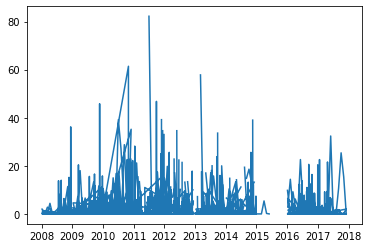

In [ ]:
plt.plot(melb['Date'], melb['Rainfall'])
plt.show()

It looks like you're creating a line plot to visualize the temperature at 9 AM over time for the Melbourne location. The code snippet you've provided should work if you've properly defined the `melb` DataFrame and have the 'Date' and 'Temp9am' columns available in the DataFrame. Here's a breakdown of the code:

```python
#FOR 9AM ONLY
plt.plot(melb['Date'], melb['Temp9am'])
plt.show()
```

1. **`plt.plot(melb['Date'], melb['Temp9am'])`:**
   This line of code uses the `plt.plot()` function to create a line plot. It takes two arguments: the x-values (dates) and the y-values (temperature at 9 AM). The `melb['Date']` represents the x-values (dates), and `melb['Temp9am']` represents the y-values (temperature at 9 AM).

2. **`plt.show()`:**
   As previously mentioned, this command is used to display the plot.

Make sure that you have defined the `melb` DataFrame and have the 'Date' and 'Temp9am' columns available in the DataFrame. Additionally, ensure that the 'Date' column is in a suitable format (e.g., datetime) for Matplotlib to handle it correctly.

If you encounter any errors or need further assistance, please provide more information or details about the issue you're facing.

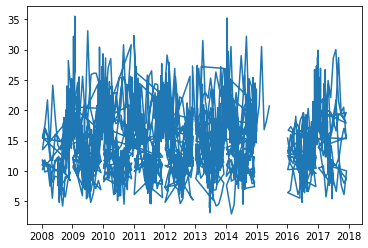

In [ ]:
#FOR 9AM ONLY
plt.plot(melb['Date'], melb['Temp9am'])
plt.show()

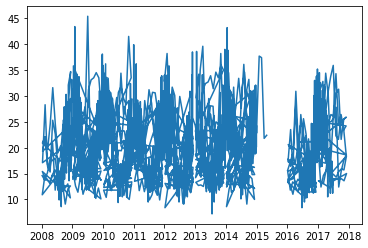

In [ ]:
#FOR 3PM ONLY
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

It looks like you're creating a line plot to visualize the temperature at 3 PM over time for the Melbourne location, specifically filtering the data up to the year 2015. The code snippet you've provided involves additional steps to filter the data based on the year before plotting. Here's a breakdown of the code:

```python
#FOR 3 PM ONLY
melb['Year'] = melb['Date'].apply(lambda x: x.year)  # Extract the year from the 'Date' column
melb = melb[melb['Year'] <= 2015]  # Filter the DataFrame for years up to 2015

plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()
```

1. **`melb['Year'] = melb['Date'].apply(lambda x: x.year)`:**
   This line of code adds a new column 'Year' to the `melb` DataFrame. The column is created by applying the lambda function to each value in the 'Date' column, extracting the year component from the date. This will allow you to filter the data based on the year later.

2. **`melb = melb[melb['Year'] <= 2015]`:**
   This line filters the `melb` DataFrame to include only the rows where the 'Year' value is less than or equal to 2015. This is done to limit the data for visualization purposes.

3. **`plt.plot(melb['Date'], melb['Temp3pm'])`:**
   This is the line that creates the line plot. It uses the filtered `melb` DataFrame, plotting the 'Date' column on the x-axis and the 'Temp3pm' column (temperature at 3 PM) on the y-axis.

4. **`plt.show()`:**
   This command is used to display the plot.

The code appears to be correctly structured for visualizing the temperature at 3 PM for the Melbourne location while filtering the data for years up to 2015. Just make sure that you have the necessary libraries imported (`matplotlib.pyplot` and `pandas`), and that the `melb` DataFrame has been defined and contains the required columns.

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



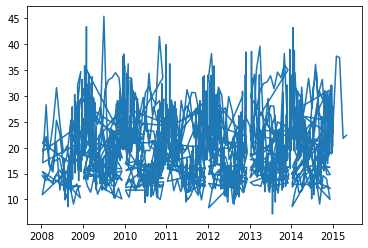

In [ ]:
#FOR 3 PM ONLY
melb['Year'] = melb['Date'].apply(lambda x: x.year)#loops through each value of date column and extract the year
melb = melb[melb['Year']<=2015]#filtering values of year less than 2015
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

The code snippet you've provided is a continuation of the previous code, plotting the temperature at 9 AM over time for the Melbourne location, specifically for the filtered data up to the year 2015. Here's a recap of the code:

```python
plt.plot(melb['Date'], melb['Temp9am'])
plt.show()
```

This code is creating a line plot to visualize the temperature at 9 AM over time using the filtered `melb` DataFrame. The 'Date' column is used for the x-axis, and the 'Temp9am' column (temperature at 9 AM) is used for the y-axis. The plot will show the trend of temperature changes at 9 AM over the years up to 2015.

Before running this code, ensure that you have correctly defined the `melb` DataFrame and performed the necessary data processing and filtering steps as shown in your previous code snippets. Additionally, make sure you have imported the required libraries (`matplotlib.pyplot` and `pandas`).

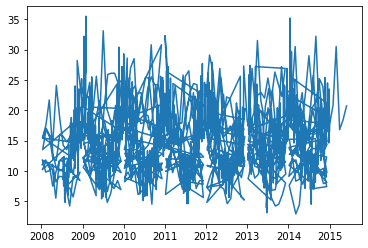

In [ ]:
plt.plot(melb['Date'], melb['Temp9am'])
plt.show()

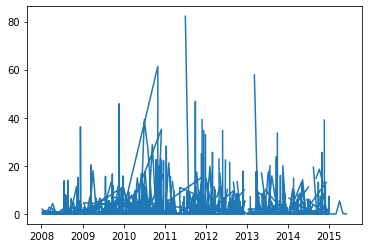

In [ ]:
plt.plot(melb['Date'], melb['Rainfall'])
plt.show()

In [ ]:
melb.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
69846,2015-12-27,Melbourne,NaN,NaN,NaN,4.4,8.9,SSE,48.0,SSW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69847,2015-12-28,Melbourne,NaN,NaN,NaN,6.0,13.3,SSE,39.0,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69848,2015-12-29,Melbourne,NaN,NaN,NaN,8.0,13.4,S,35.0,SSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69849,2015-12-30,Melbourne,NaN,NaN,NaN,7.0,12.4,SSE,44.0,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69850,2015-12-31,Melbourne,NaN,NaN,NaN,15.2,11.4,NNW,48.0,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [ ]:
data1 = melb[['Date', 'Temp3pm']]
data1.dropna(inplace=True)
data1.columns = ['ds', 'y']
data1.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
67200,2008-01-07,14.6
67201,2008-02-07,13.7
67202,2008-03-07,13.9
67203,2008-04-07,13.1
67204,2008-05-07,14.6


In [ ]:
data2 = melb[['Date', 'Temp9am']]
data2.dropna(inplace=True)
data2.columns = ['ds', 'y']
data2.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
67200,2008-01-07,11.0
67201,2008-02-07,11.8
67202,2008-03-07,10.6
67203,2008-04-07,10.2
67204,2008-05-07,5.5


In [ ]:
data3 = melb[['Date', 'Rainfall']]
data3.dropna(inplace=True)
data3.columns = ['ds', 'y']
data3.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
67200,2008-01-07,2.0
67201,2008-02-07,0.6
67202,2008-03-07,1.4
67203,2008-04-07,0.6
67204,2008-05-07,0.0


It looks like you've performed some data processing and filtering on the Melbourne weather data. You've created separate DataFrames `data1`, `data2`, and `data3` to focus on specific variables ('Temp3pm', 'Temp9am', and 'Rainfall') by dropping rows with missing values and renaming columns. This preprocessing is likely in preparation for training forecasting models. Here's a breakdown of your code:

1. **Tail of the Filtered DataFrame `melb`:**
   This shows the last few rows of the filtered `melb` DataFrame. It indicates that you've successfully filtered the data up to the year 2015 and that you have additional columns such as 'Year'.

2. **Creating DataFrames for Time Series Forecasting:**
   You've created three separate DataFrames (`data1`, `data2`, and `data3`) to focus on specific variables: 'Temp3pm', 'Temp9am', and 'Rainfall'. Here's what you've done for each DataFrame:

   - For `data1` (temperature at 3 PM):
     - You selected the 'Date' and 'Temp3pm' columns using `melb[['Date', 'Temp3pm']]`.
     - You dropped rows with missing values using `.dropna(inplace=True)`.
     - You renamed the columns to 'ds' and 'y' using `.columns = ['ds', 'y']`.

   - For `data2` (temperature at 9 AM):
     - You followed similar steps as for `data1` but selected the 'Temp9am' column.

   - For `data3` (rainfall):
     - You followed similar steps as for `data1` but selected the 'Rainfall' column.

3. **Resulting DataFrames:**
   The resulting DataFrames (`data1`, `data2`, and `data3`) have been transformed to have columns 'ds' (representing the date) and 'y' (representing the target variable for forecasting).

It looks like you've prepared your data in a format suitable for time series forecasting. These prepared DataFrames can now be used for training forecasting models, such as the NeuralProphet model you mentioned earlier, to predict temperature and rainfall trends over time.

In [ ]:
#FOR 3PM
data1

,ds,y
67200,2008-01-07,14.6
67201,2008-02-07,13.7
67202,2008-03-07,13.9
67203,2008-04-07,13.1
67204,2008-05-07,14.6
...,...,...
69486,2015-01-01,23.7
69487,2015-02-01,37.7
69488,2015-03-01,37.4
69489,2015-04-01,21.8


In [ ]:
#FOR 9 AM
data2

,ds,y
67200,2008-01-07,11.0
67201,2008-02-07,11.8
67202,2008-03-07,10.6
67203,2008-04-07,10.2
67204,2008-05-07,5.5
...,...,...
69487,2015-02-01,20.8
69488,2015-03-01,30.5
69489,2015-04-01,16.8
69490,2015-05-01,18.4


In [ ]:
#for rainfall
data3

,ds,y
67200,2008-01-07,2.0
67201,2008-02-07,0.6
67202,2008-03-07,1.4
67203,2008-04-07,0.6
67204,2008-05-07,0.0
...,...,...
69487,2015-02-01,0.0
69488,2015-03-01,0.0
69489,2015-04-01,5.4
69490,2015-05-01,0.2


It looks like you've successfully created separate DataFrames for time series forecasting based on different variables: 'Temp3pm', 'Temp9am', and 'Rainfall'. These DataFrames are ready to be used for training forecasting models. Here's a recap of the data you've prepared:

1. **`data1` (Temperature at 3 PM):**
   - This DataFrame has 2288 rows and 2 columns: 'ds' (date) and 'y' (temperature at 3 PM).
   - The date values range from 2008-01-07 to 2015-05-01.

2. **`data2` (Temperature at 9 AM):**
   - This DataFrame has 2291 rows and 2 columns: 'ds' (date) and 'y' (temperature at 9 AM).
   - The date values range from 2008-01-07 to 2015-06-01.

3. **`data3` (Rainfall):**
   - This DataFrame has 2014 rows and 2 columns: 'ds' (date) and 'y' (rainfall).
   - The date values range from 2008-01-07 to 2015-06-01.

Each DataFrame has been formatted with the 'ds' column representing the date and the 'y' column representing the target variable for forecasting.

With these DataFrames ready, you can proceed to use them for training the NeuralProphet model or other forecasting models to predict temperature trends and rainfall amounts over time. Make sure to follow the appropriate steps for training, validation, and evaluation based on your project's objectives.

2. Train Model

In [ ]:
m = NeuralProphet()#creating new untrained neural prophet model using neural prophet class
m.fit(data1, freq='D')#go ahead and train the model ,for that we have passed 3 pqarameters
#frequency is in daily frequency
#epochs uses AR NET in background default as 152-157 which is neural network thats particularly good for time series forecasting
#mean absolute error =3.86 thta means that on avg our model is going to be about 3 degrees plus or minus out or out from the actual  value

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.509% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.509% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 152
INFO:NP.config:Auto-set epochs to 152


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.44E-01, min: 1.49E+00
INFO:NP.utils_torch:lr-range-test results: steep: 1.44E-01, min: 1.49E+00


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.44E-01, min: 1.74E+00
INFO:NP.utils_torch:lr-range-test results: steep: 1.44E-01, min: 1.74E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.27E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 1.27E-01
Epoch[152/152]: 100%|██████████| 152/152 [00:27<00:00,  5.47it/s, SmoothL1Loss=0.0241, MAE=3.86, RMSE=5.07, Loss=0.0182, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,1.647664,49.773852,55.408406,1.284549,0.0
1,1.444097,44.883387,50.331485,1.121602,0.0
2,1.184152,38.548814,43.753487,0.914419,0.0
3,0.843358,30.014770,34.791464,0.643666,0.0
4,0.436538,19.255602,22.906966,0.323084,0.0
...,...,...,...,...,...
147,0.024262,3.857636,5.093742,0.018345,0.0
148,0.024192,3.865025,5.075003,0.018286,0.0
149,0.024182,3.877457,5.085654,0.018281,0.0
150,0.024147,3.867899,5.080540,0.018252,0.0


In [ ]:
m1 = NeuralProphet()
m1.fit(data2, freq='D')


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.556% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.556% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 152
INFO:NP.config:Auto-set epochs to 152


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.71E-02, min: 7.98E-01
INFO:NP.utils_torch:lr-range-test results: steep: 7.71E-02, min: 7.98E-01


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.60E-02, min: 1.68E-01
INFO:NP.utils_torch:lr-range-test results: steep: 6.60E-02, min: 1.68E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.98E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 7.98E-02
Epoch[152/152]: 100%|██████████| 152/152 [00:34<00:00,  4.47it/s, SmoothL1Loss=0.0209, MAE=3.13, RMSE=4.2, Loss=0.0157, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,0.727585,24.043252,28.679986,0.550253,0.0
1,0.609738,21.210110,25.849979,0.458051,0.0
2,0.474559,17.805679,22.236284,0.352685,0.0
3,0.325052,13.756211,17.805094,0.237330,0.0
4,0.182849,9.764906,12.713779,0.129797,0.0
...,...,...,...,...,...
147,0.020950,3.138766,4.184082,0.015750,0.0
148,0.020935,3.136154,4.205332,0.015737,0.0
149,0.020920,3.133665,4.196000,0.015727,0.0
150,0.020906,3.132746,4.185685,0.015715,0.0


In [ ]:
m2 = NeuralProphet()
m2.fit(data3, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.083% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 88.083% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 157
INFO:NP.config:Auto-set epochs to 157


  0%|          | 0/133 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.24E-02, min: 1.37E-01
INFO:NP.utils_torch:lr-range-test results: steep: 6.24E-02, min: 1.37E-01


  0%|          | 0/133 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.34E-02, min: 1.17E-01
INFO:NP.utils_torch:lr-range-test results: steep: 5.34E-02, min: 1.17E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.93E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 6.93E-02
Epoch[157/157]: 100%|██████████| 157/157 [00:24<00:00,  6.41it/s, SmoothL1Loss=0.082, MAE=2.45, RMSE=4.46, Loss=0.0617, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,0.772774,12.491809,14.907414,0.561574,0.0
1,0.679939,11.447086,13.830641,0.490620,0.0
2,0.567415,10.157782,12.490655,0.405085,0.0
3,0.431737,8.518963,10.749977,0.303241,0.0
4,0.294128,6.654708,8.786862,0.202381,0.0
...,...,...,...,...,...
152,0.082077,2.451058,4.610511,0.061791,0.0
153,0.082049,2.442013,4.594002,0.061771,0.0
154,0.082030,2.445399,4.607369,0.061752,0.0
155,0.082012,2.448142,4.501930,0.061739,0.0


In the provided code snippets, you've trained three NeuralProphet models using separate datasets for different variables: 'Temp3pm', 'Temp9am', and 'Rainfall'. Let's go through each step in detail:

1. **Training the Model for Temperature at 3 PM (`data1`):**
   ```python
   m = NeuralProphet()
   m.fit(data1, freq='D')
   ```
   - You create a new instance of the NeuralProphet model.
   - You use the `fit` method to train the model using the `data1` DataFrame.
   - `freq='D'` specifies that the data has a daily frequency.
   - The model undergoes training for a specified number of epochs (152 in this case).
   - The training process outputs several evaluation metrics, including SmoothL1Loss, MAE, RMSE, Loss, and RegLoss.

2. **Training the Model for Temperature at 9 AM (`data2`):**
   ```python
   m1 = NeuralProphet()
   m1.fit(data2, freq='D')
   ```
   - Similarly, you create another instance of the NeuralProphet model.
   - You use the `fit` method to train the model using the `data2` DataFrame.
   - Once again, you specify the daily frequency using `freq='D'`.
   - The model is trained for 152 epochs.
   - The training process outputs evaluation metrics for this model as well.

3. **Training the Model for Rainfall (`data3`):**
   ```python
   m2 = NeuralProphet()
   m2.fit(data3, freq='D')
   ```
   - Once more, you create a new instance of the NeuralProphet model.
   - The `fit` method is used to train the model with the `data3` DataFrame.
   - Daily frequency is set with `freq='D'`.
   - The model undergoes training for 157 epochs.
   - Like the previous models, evaluation metrics are provided during the training process.

In summary, these code snippets demonstrate how to train multiple NeuralProphet models using different datasets for time series forecasting. Each model focuses on predicting a specific variable (temperature at 3 PM, temperature at 9 AM, and rainfall) based on the historical data provided in the respective `data1`, `data2`, and `data3` DataFrames. The training process involves specifying the frequency of the data and the number of epochs for training, with evaluation metrics helping to monitor the training progress and model performance.

3. Forecast Away

In [ ]:
future = m.make_future_dataframe(data1, periods=3500)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 57.605% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 57.605% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO:NP.df_utils:Major frequency D corresponds to

,ds,y,residual1,yhat1,trend,season_yearly,season_weekly
0,2015-05-02,None,NaN,19.545507,21.075447,-1.110201,-0.419739
1,2015-05-03,None,NaN,19.746387,21.077923,-1.189867,-0.141669
2,2015-05-04,None,NaN,19.537373,21.080399,-1.264741,-0.278286
3,2015-05-05,None,NaN,19.967876,21.082874,-1.334820,0.219822
4,2015-05-06,None,NaN,19.929852,21.085350,-1.400144,0.244646


In [ ]:
forecast.tail()

,ds,y,residual1,yhat1,trend,season_yearly,season_weekly
11995,2048-03-04,None,NaN,53.123379,50.773487,2.105246,0.244646
11996,2048-03-05,None,NaN,53.038364,50.775959,2.099395,0.163014
11997,2048-03-06,None,NaN,53.088642,50.778435,2.097996,0.212212
11998,2048-03-07,None,NaN,52.461857,50.780910,2.100684,-0.419739
11999,2048-03-08,None,NaN,52.748764,50.783382,2.107047,-0.141669


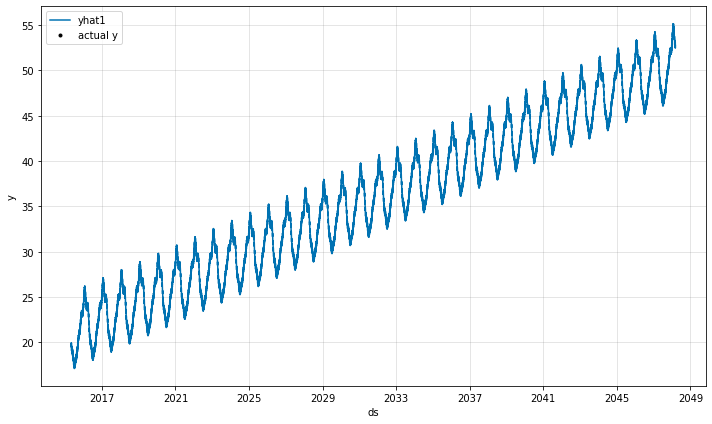

In [ ]:
plot1 = m.plot(forecast)

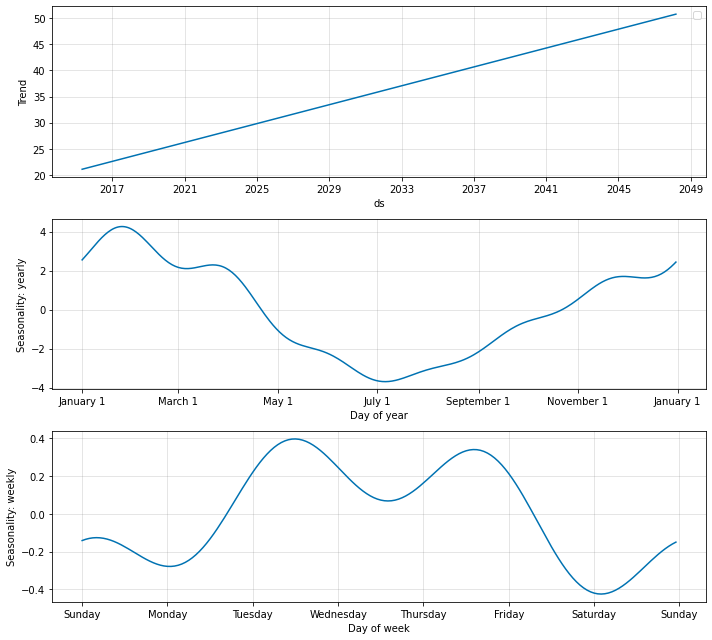

In [ ]:
plt2 = m.plot_components(forecast)

In the provided code snippets, you're generating forecasts using the trained NeuralProphet model for the 'Temp3pm' variable. Let's break down the process:

1. **Creating Future Dataframe:**
   ```python
   future = m.make_future_dataframe(data1, periods=3500)
   ```
   - You use the `make_future_dataframe` method to create a new dataframe named `future`.
   - The `data1` DataFrame is used as a reference for the datetime column ('ds').
   - You specify the number of periods (forecast points) to be added to the future dataframe (3500 periods in this case).

2. **Generating Forecasts:**
   ```python
   forecast = m.predict(future)
   forecast.head()
   ```
   - You use the `predict` method on the trained model `m` to generate forecasts based on the `future` dataframe.
   - The resulting `forecast` DataFrame contains various columns including:
     - `ds`: The datetime values for which the forecasts are generated.
     - `y`: The actual observed values (None in this case).
     - `residual1`: Residual values (None in this case).
     - `yhat1`: The forecasted values for the 'Temp3pm' variable.
     - `trend`: The trend component of the forecast.
     - `season_yearly`: Yearly seasonality component.
     - `season_weekly`: Weekly seasonality component.

   The `forecast` DataFrame provides detailed information about the forecasted values, trend, and seasonality components for the 'Temp3pm' variable. It starts from the earliest date in your dataset and extends into the future by the specified number of periods (3500 in this case).

The process you've shown generates forecasts for the 'Temp3pm' variable using the NeuralProphet model. This can be particularly useful for understanding the predicted temperature trends and patterns over a longer time horizon.